 The dataset is taken from https://www.kaggle.com/datasets/overload10/adult-census-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, f1_score, recall_score

In [2]:
df = pd.read_csv("adult.csv")
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [3]:
df["country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [4]:
df.shape

(32561, 15)

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [10]:
df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [11]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## Exploratory Data Analysis

In [12]:
# To get the proportion of data labels
per = df.salary.value_counts(normalize=True)
per

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

<AxesSubplot:>

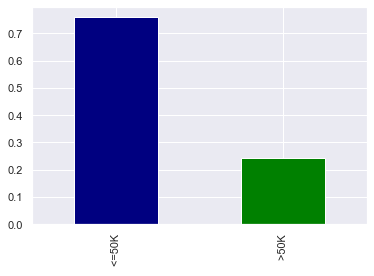

In [13]:
per.plot.bar(color= ("navy","green"))

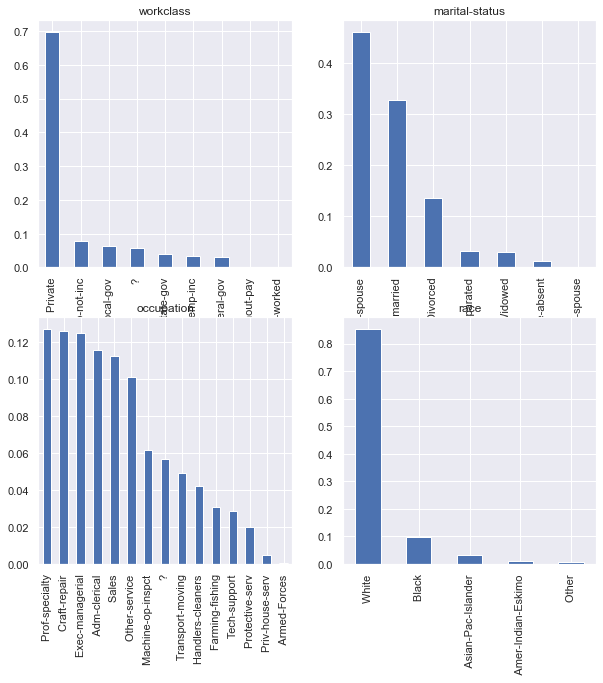

In [14]:
plt.figure(1)
plt.subplot(221)
df["workclass"].value_counts(normalize= True).plot.bar(figsize=(10,10), title="workclass")

plt.subplot(222)
df["marital-status"].value_counts(normalize= True).plot.bar(figsize=(10,10), title="marital-status")

plt.subplot(223)
df["occupation"].value_counts(normalize= True).plot.bar(figsize=(10,10), title="occupation")

plt.subplot(224)
df["race"].value_counts(normalize= True).plot.bar(figsize=(10,10), title="race");


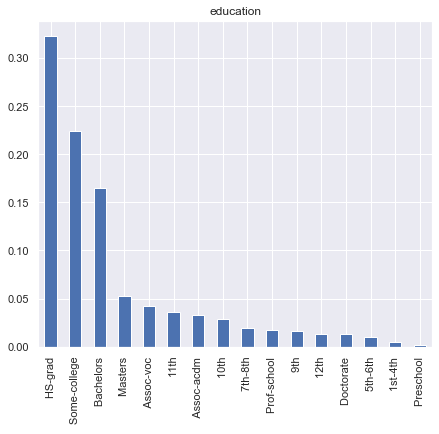

In [15]:
plt.figure(1)
plt.subplot(131)
df["education"].value_counts(normalize= True).plot.bar(figsize=(24,6), title="education");

<AxesSubplot:xlabel='education', ylabel='count'>

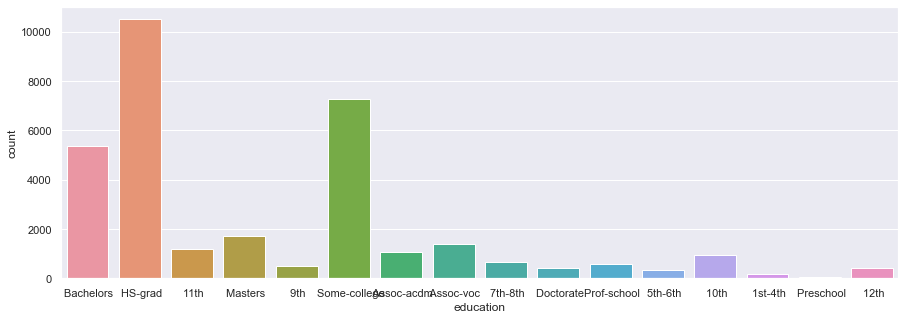

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x= df["education"])

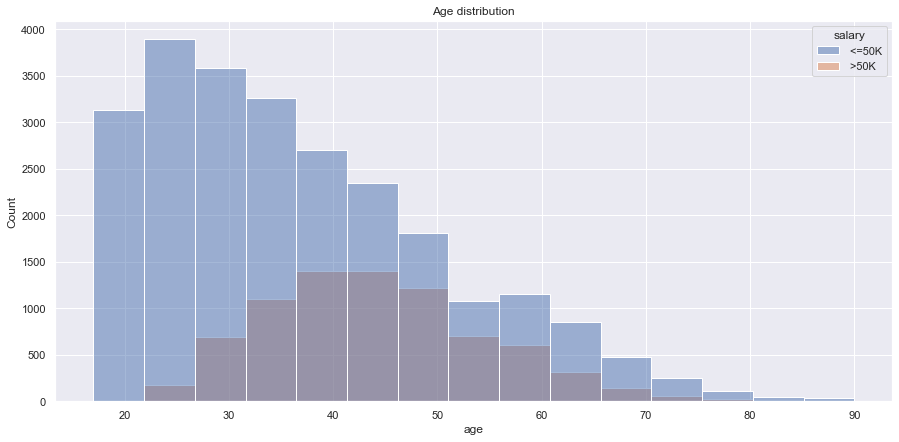

In [17]:
# Age and salary distribution

plt.figure(figsize=(15,7))
sns.histplot(x=df['age'],hue=df['salary'],bins=15)
plt.title('Age distribution');

<AxesSubplot:xlabel='count', ylabel='workclass'>

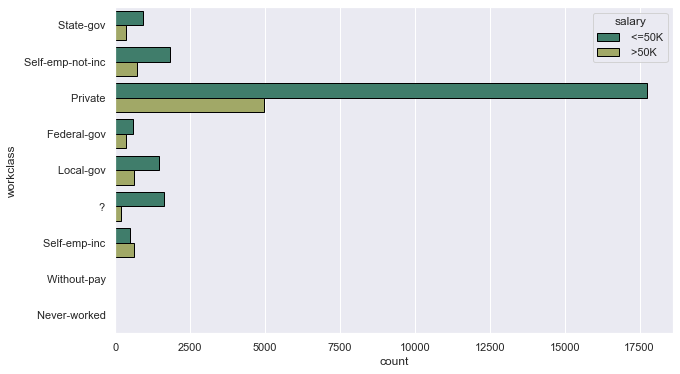

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['workclass'],hue=df['salary'],palette='gist_earth',edgecolor="black")

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

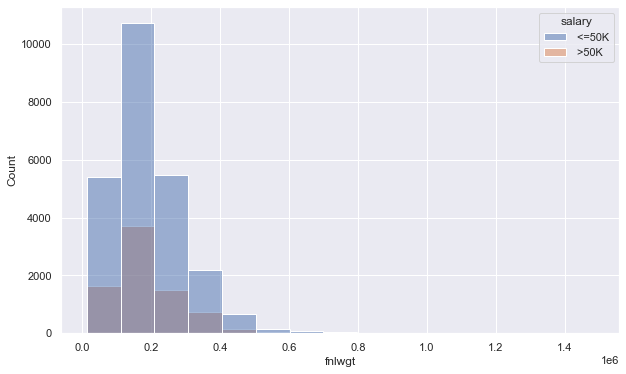

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['fnlwgt'],hue=df['salary'],bins=15)

<AxesSubplot:xlabel='count', ylabel='education'>

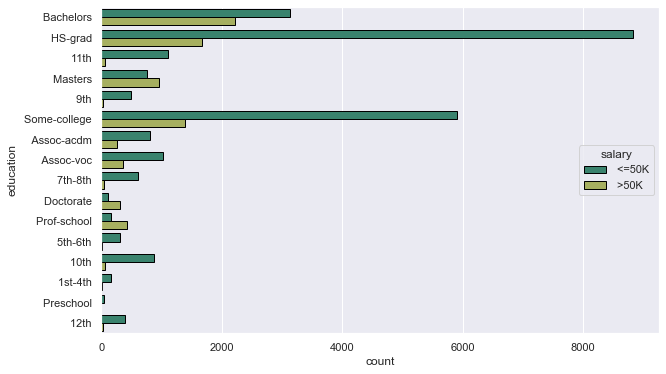

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='gist_earth',saturation=0.9,edgecolor="black")

In [21]:
df["education"].unique

<bound method Series.unique of 0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name: education, Length: 32561, dtype: object>

In [22]:
def sort_education(val):
    
    if (val==' Preschool')|(val==' 1st-4th')|(val==' 5th-6th')|(val==' 7th-8th')|(val==' 9th')|(val==' 10th')|(val==' 11th')|(val==' 12th'):
        return 'School_Academics'
    else:
        return val

In [23]:
df['education']=df['education'].apply(sort_education)

In [24]:
df["education"].unique()

array([' Bachelors', ' HS-grad', 'School_Academics', ' Masters',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Doctorate',
       ' Prof-school'], dtype=object)

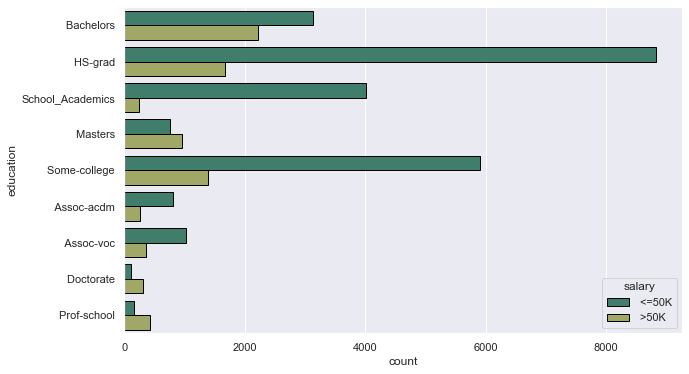

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['education'],hue=df['salary'],palette='gist_earth',edgecolor="black");

<AxesSubplot:xlabel='count', ylabel='marital-status'>

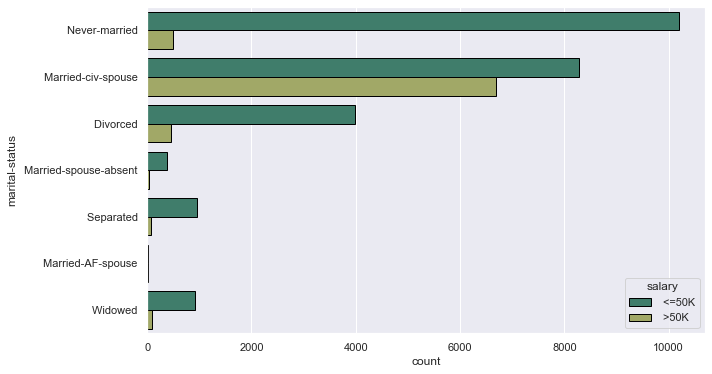

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['marital-status'],hue=df['salary'],palette='gist_earth', edgecolor = "black")

In [27]:
df["marital-status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [28]:
## Sorting marital status

def mar_status(x):
    if (x ==" Never-married")|(x == ' Divorced')|(x == ' Separated')|(x == ' Widowed'):
        return "Single"
    else:
        return "Married"

In [29]:
df["marital-status"] = df["marital-status"].apply(mar_status)
df["marital-status"].unique()

array(['Single', 'Married'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

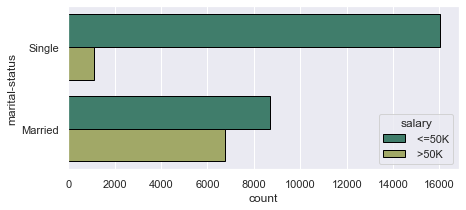

In [30]:
plt.figure(figsize=(7,3))
sns.countplot(y=df["marital-status"], hue=df["salary"], palette="gist_earth",edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='occupation'>

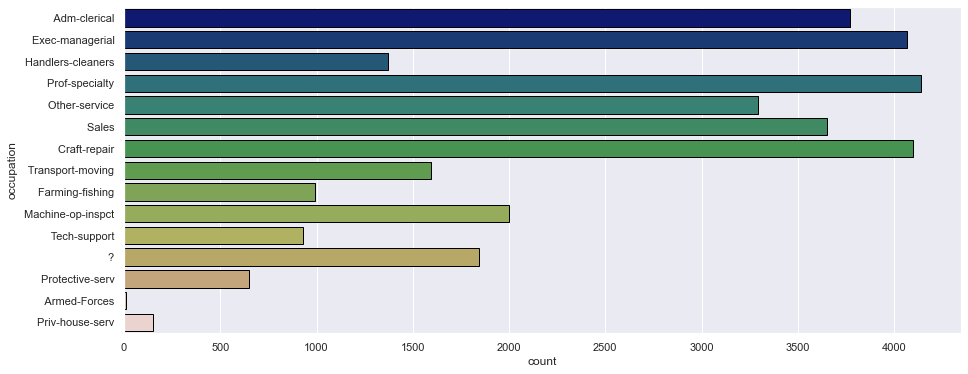

In [31]:
plt.figure(figsize=(15,6))
sns.countplot(y=df['occupation'],palette='gist_earth',saturation=0.9,edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='occupation'>

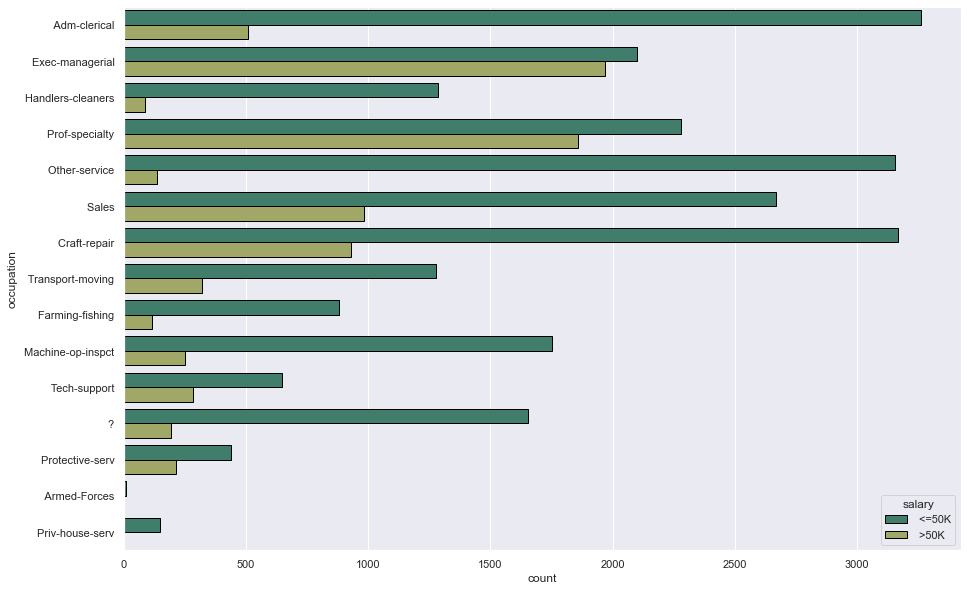

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(y=df["occupation"], hue=df["salary"], palette="gist_earth",edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='relationship'>

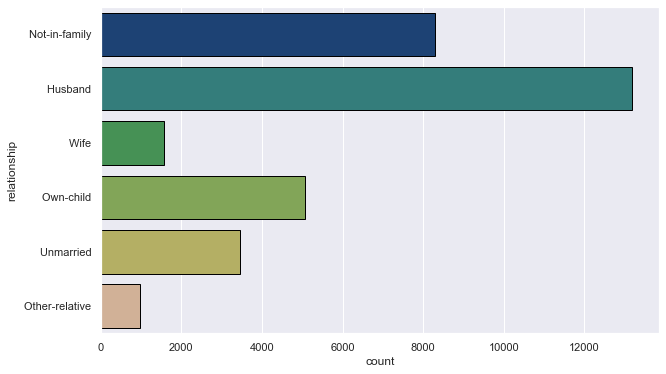

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['relationship'],palette='gist_earth',saturation=0.9,edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='relationship'>

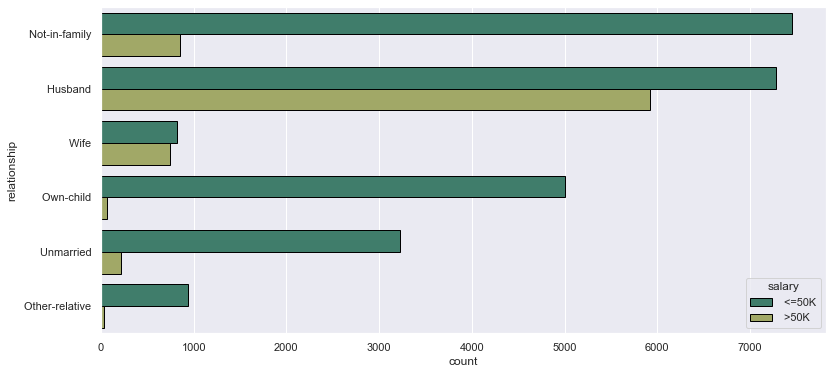

In [34]:
plt.figure(figsize=(13,6))
sns.countplot(y=df["relationship"], hue=df["salary"], palette="gist_earth",edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='race'>

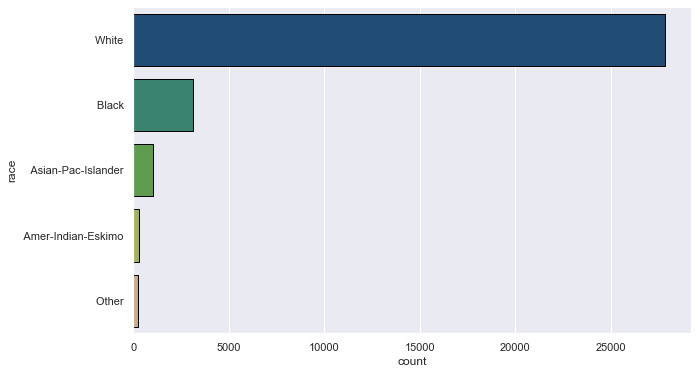

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(y=df['race'],palette='gist_earth',saturation=0.9,edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='race'>

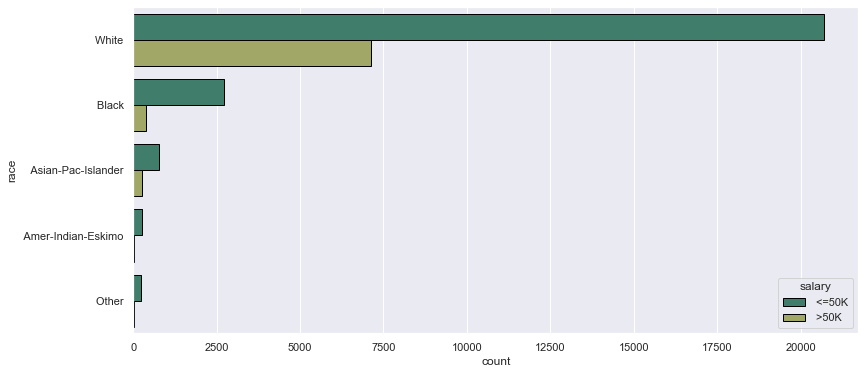

In [36]:
plt.figure(figsize=(13,6))
sns.countplot(y=df["race"], hue=df["salary"], palette="gist_earth",edgecolor="black")

<AxesSubplot:xlabel='count', ylabel='sex'>

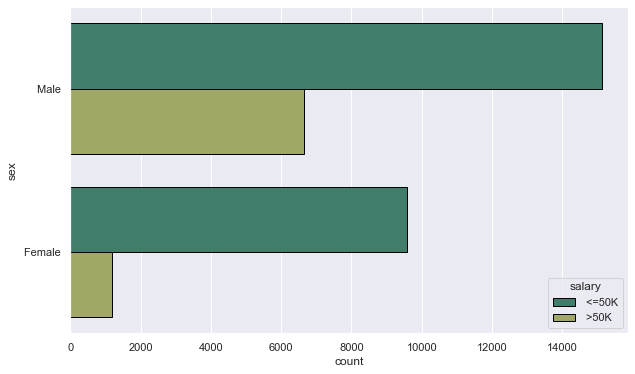

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(y=df["sex"], hue=df["salary"], palette="gist_earth",edgecolor="black")

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

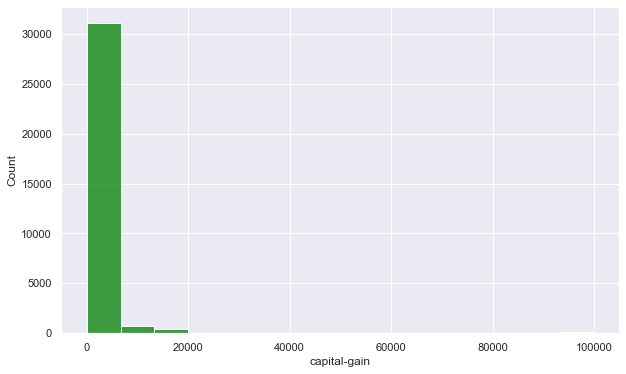

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-gain'],color='green',bins=15)

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

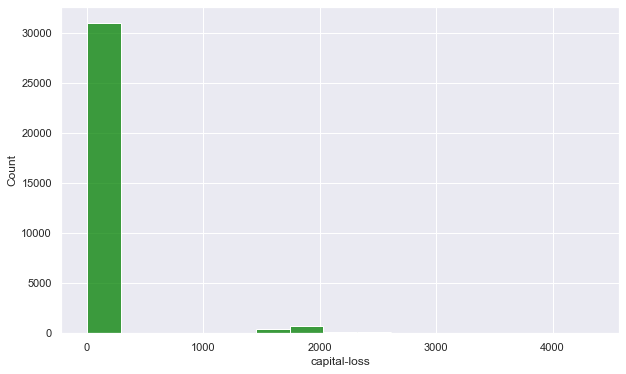

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(df['capital-loss'],color='green',bins=15)

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

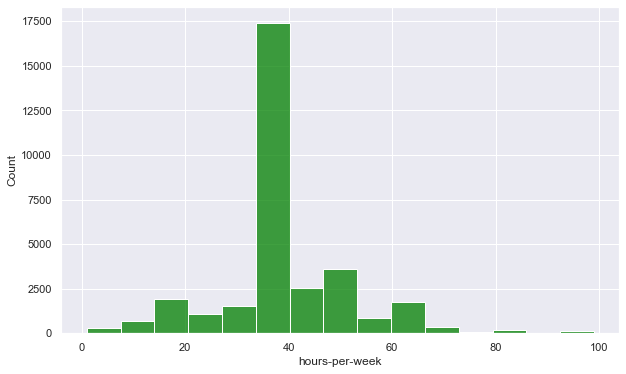

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(df['hours-per-week'],color='green',bins=15)

In [41]:
def work_hour(time):
    if time < 40:
        return ('<40 hours')
    elif time == 40:
        return ('40 hours')
    else:
        return (">40 hours")

In [42]:
df["hours-per-week"] = df["hours-per-week"].apply(work_hour)
df["hours-per-week"].unique()

array(['40 hours', '<40 hours', '>40 hours'], dtype=object)

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

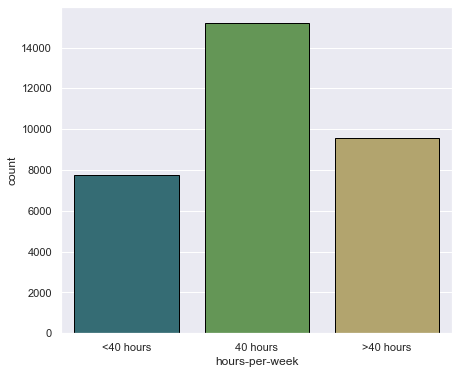

In [43]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['hours-per-week'],palette='gist_earth',edgecolor="black",order=['<40 hours','40 hours','>40 hours'])

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

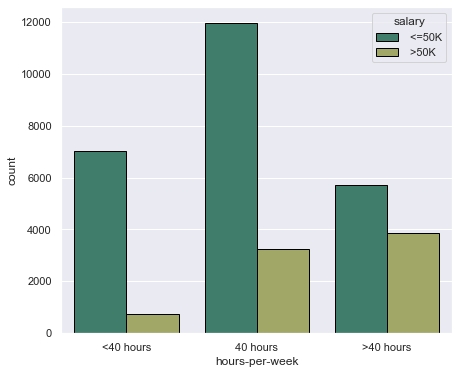

In [44]:
plt.figure(figsize=(7,6))
sns.countplot(x=df['hours-per-week'],hue=df["salary"],palette='gist_earth',edgecolor="black",order=['<40 hours','40 hours','>40 hours'])

In [45]:
for i in df.columns:
    print (df[i].value_counts())
    

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
 HS-grad            10501
 Some-college        7291
 Bachelors           5355
School_Academics     4253
 Masters             1723
 Assoc-voc           1382
 Assoc-acdm          1067
 Prof-school          576
 Doctorate            413
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514


## Feature Engineering

In [46]:
df["workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [47]:
df.drop(df[(df["workclass"] == ' ?')].index, inplace = True)
df.drop(df[df["occupation"] == ' ?'].index, inplace = True)
df.drop(df[df["country"] == ' ?'].index, inplace = True)


In [48]:
df.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40 hours,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,<40 hours,United-States,<=50K
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40 hours,United-States,<=50K


In [49]:
X = df.drop(["education-num", "country", "relationship", "race", "salary"], axis=1)
y = df["salary"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [51]:
from sklearn.preprocessing import LabelEncoder

categorical = ['workclass', 'education', 'marital-status', 'occupation', 'sex','hours-per-week']
for feature in categorical:
        le = LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])
        
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [52]:
X_train

,age,workclass,fnlwgt,education,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week
22210,54,5,119565,2,0,3,1,0,0,0
16225,57,2,136107,8,0,2,1,0,0,0
24152,21,2,163870,8,0,7,1,3908,0,0
13474,51,2,284211,4,1,9,0,0,0,1
7367,49,0,110373,7,0,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
31189,67,5,132819,7,0,10,1,0,0,2
14101,40,2,82161,2,1,0,1,0,0,0
26624,45,2,48271,7,0,0,0,0,0,0
8931,20,2,187158,7,1,0,0,0,0,1


In [53]:
models = {'LogisticRegression':LogisticRegression(),
          'RandomForestClassifier':RandomForestClassifier(),
          'SupportVectorClassifier':SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
}

# Creating a function to determine the scores and fit the models
def fit_and_score(models,X_train,X_test,y_train,y_test):
  # Setup the random seed
  np.random.seed(42)

  # Make a dictionary to keep model_Scores
  model_scores = {}

  for name,model in models.items():
    # Fit the model into the data
    model.fit(X_train,y_train)

    # Evaluate the model and append and its scores to model_scores
    model_scores[name]  = model.score(X_test,y_test)

  # Return the model scores
  return model_scores

In [54]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

{'LogisticRegression': 0.7908171722194597,
 'RandomForestClassifier': 0.8529753025029008,
 'SupportVectorClassifier': 0.787336316923587,
 'DecisionTreeClassifier': 0.8102105088678933}

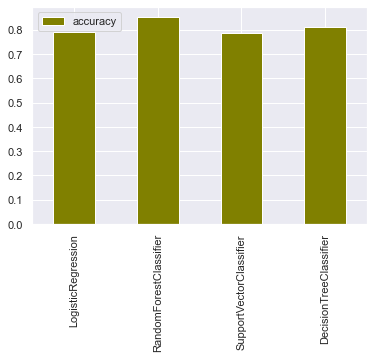

In [55]:
## Let's plot the scores
model_comparison = pd.DataFrame(model_scores,index=['accuracy'])
model_comparison.T.plot.bar(color="Olive");

In [56]:
log_reg_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]}


In [57]:
log_reg_model = RandomizedSearchCV(RandomForestClassifier(),
                                   cv=5,
                                   param_distributions = log_reg_grid,
                                   n_iter = 20,
                                   verbose=True)

In [58]:
log_reg_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600]},
                   verbose=True)

In [59]:
log_reg_model.score(X_test, y_test)

0.8642466434609647

In [60]:
log_reg_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}